In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


리숙스 zip파일 압축해제하는 코드

In [7]:
!unzip /content/drive/MyDrive/dataset/dataset.zip -d /content/sample_data/

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/sample_data/archive/casting_data/casting_data/train/def_front/cast_def_0_5881.jpeg  
  inflating: /content/sample_data/__MACOSX/archive/casting_data/casting_data/train/def_front/._cast_def_0_5881.jpeg  
  inflating: /content/sample_data/archive/casting_data/casting_data/train/def_front/cast_def_0_4639.jpeg  
  inflating: /content/sample_data/__MACOSX/archive/casting_data/casting_data/train/def_front/._cast_def_0_4639.jpeg  
  inflating: /content/sample_data/archive/casting_data/casting_data/train/def_front/cast_def_0_958.jpeg  
  inflating: /content/sample_data/__MACOSX/archive/casting_data/casting_data/train/def_front/._cast_def_0_958.jpeg  
  inflating: /content/sample_data/archive/casting_data/casting_data/train/def_front/cast_def_0_7015.jpeg  
  inflating: /content/sample_data/__MACOSX/archive/casting_data/casting_data/train/def_front/._cast_def_0_7015.jpeg  
  inflating: /content/sample_data/archive/casting_data/casting_dat

In [8]:
!cd /content/sample_data/archive/casting_data/casting_data/
!ls

drive  sample_data


In [53]:
!cd /

In [9]:
!mv sample_data/archive/casting_data/casting_data/test/ sample_data/archive/casting_data/casting_data/valid/

### 모델 선언

### 학습량 설정

In [2]:
import torch

num_classes = 2
batch_size = 256
num_workers = 1 # 멀티 프로세싱과 관련된 파라미터
lr = 0.005

### 데이터 불러오기

In [3]:
import torch # 페이스북에서 제공하는 딥러닝 툴
from torch.utils.data import DataLoader # 우리가 실제로 학습할 때 이용할 수 있게 형태로 만들어주는 라이브러리
# 인공신경망이란 : 사람의 뇌가 생각하는 방식을 소프트웨어가 그런 방식을 흉내낸것
from torch import nn  # 
import torchvision
from torchvision import transforms # 변환
import torchvision.datasets as datasets
import os
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# 경로 설정
data_dir = '/content/sample_data/archive/casting_data/casting_data/'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'valid')
print(train_dir)

/content/sample_data/archive/casting_data/casting_data/train


In [5]:
# transforms.Compose
#
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),  # 이미지 사이즈 변경
        transforms.RandomHorizontalFlip(),  # 확률적으로 이미지를 수평으로 뒤집음
        # train 데이터를 랜덤으로 변형시켜서 학습 (overfitting 방지)
        transforms.ToTensor(), # numpy 이미지에서 torch (배열) 이미지로 변경
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(256),             # 이미지 사이즈 변경 (전처리)
                                            # train으로 훈련시킨 모델의 정확도를 판별하기 위해 변형 X
        transforms.CenterCrop(224),         # 가운데를 224 사이즈로 자름
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}
# print(data_transforms['train'])
print(datasets)




<module 'torchvision.datasets' from '/usr/local/lib/python3.7/dist-packages/torchvision/datasets/__init__.py'>


In [11]:
# 이미지 불러오기
datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                    data_transforms[x])
                  for x in ['train', 'valid']}

In [90]:
print(batch_size) # 결과 값 256

256


In [91]:
# DataLoader : 우리가 실제로 학습할 수 있는 형태로 변환해주는 라이브러리
#?왜 변환을 해야하는지 ? 
dataloaders = {x: torch.utils.data.DataLoader(datasets[x], # train
                                              batch_size=batch_size, # 256
                                              # shuffle=False : 출력값의 숫자를 무작위 추출이 아닌 순차적 추출
                                              # shuflle=True : 출력값의 숫자를 순차적이 아닌 무작위로 값 출력
                                              shuffle=True,
                                              num_workers=num_workers, # cpu작업을 몇 개의 코어를 사용해서 진행할지에 대한 설정 
                                              pin_memory=True,
                                              drop_last=False)
               for x in ['train', 'valid']}

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### 데이터 샘플 이미지

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

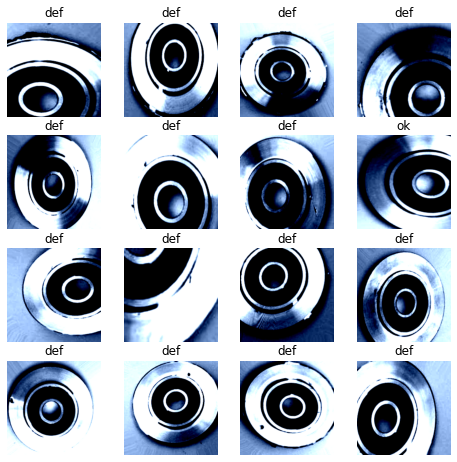

In [ ]:
# sample에 이미지, label에 0(def), 1(ok) 저장
samples, labels = iter(dataloaders['train']).next()
classes = {0: 'def', 1: 'ok'}
fig = plt.figure(figsize=(8, 16))       # (8, 16) 사이즈의 영역
for i in range(16):
    a = fig.add_subplot(4, 4, i+1)      # fig 내부에 4행 4열을 만들고 하나씩 선택
    a.set_title(classes[labels[i].item()])  # 이미지에 classes로 제목
    a.axis('off')                   #    0        1      2
    # sample[i].numpy: (3, 224, 224): (channel, height, width) -> (height, width, channel)
    a.imshow(np.transpose(samples[i].numpy(), (1, 2, 0)))
plt.subplots_adjust(top=0.5)

이미지 배열: height, width, channel

### 모델

In [ ]:
from torch import nn

class SuperLightMobileNet(nn.Module):
    def __init__(self, num_classes=1000):
        super(SuperLightMobileNet, self).__init__()
        
        # MobilNet v2
        #
        def conv_bn(inp, oup, stride):
            return nn.Sequential(
                nn.Conv2d(inp, oup, 3, stride, 1, bias=False),
                # inp = input의 채널수 / 흑백 이미지: 채널수는 1개, RGB이미지: 채널수는 3개
                # oup = 출력되는 채널수
                nn.BatchNorm2d(oup),        # 각 batch 별로 평균, 분산을 이용해 정규화
                nn.ReLU(inplace=True)       # 미분값이 0보다 작아지면 0으로
                                            # -> 미분 값이 0으로 수렴하는 현상 방지
            )

        def conv_dw(inp, oup, stride):
            return nn.Sequential(
                nn.Conv2d(inp, inp, 3, stride, 1, groups=inp, bias=False),
                nn.BatchNorm2d(inp),
                nn.ReLU(inplace=True),
    
                nn.Conv2d(inp, oup, 1, 1, 0, bias=False),
                nn.BatchNorm2d(oup),
                nn.ReLU(inplace=True),
            )

        self.num_classes = num_classes

        self.model = nn.Sequential(
            conv_bn(  3,  16, 2),
            conv_dw( 16,  32, 1),
            conv_dw( 32, 64, 2),
            conv_dw(64, 64, 1),
            conv_dw(64, 128, 2),
            conv_dw(128, 128, 1),
            conv_dw(128, 256, 2),
            conv_dw(256, 256, 1),
            conv_dw(256, 512, 2),
#           conv_dw(512, 512, 1),
#           conv_dw(512, 1024, 1)
        )
        # 2차원 배열을 1차원 배열로 
        self.gap = nn.AdaptiveAvgPool2d((1, 1))
        # 1차원 
        self.fc = nn.Linear(512, self.num_classes)
        # x: 512개의 특성을 가진 데이터
        # y: 2개(ok, def)의 특성을 가진 데이터 배열

    def forward(self, x):
        x = self.model(x)       # 모델에 x 적용
        x = self.gap(x)         # x로 추출한 2차원 배열 값 -> 1차원 배열로 변경
        x = x.view(-1, 512)     # x tensor를 (?, 512)의 형태로 변환
                                # -> (1, 512)
        x = self.fc(x)          # 1차원 배열로 계산 -> Logit 혹은 score 출력
        return x

In [ ]:
model = SuperLightMobileNet(num_classes).to(device)

In [ ]:
# 예측값과 실제값의 오차
CEloss = nn.CrossEntropyLoss()
# loss의 최솟값을 찾는 알고리즘 (parameters 값을 조절)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

### 실행 코드

In [ ]:
import numpy as np

epoch = 16
train_loss = [0]
test_loss = [0]
train_accu = [0]
test_accu = [0]

In [ ]:
import time

for i in range(epoch):
    start_time = time.time()
    model.train()

    for input, target in dataloaders['train']:
        correct = 0
        total = 0

        images = input.to(device)
        labels = target.to(device)

        outputs = model(images)         # forward를 거쳐 나온 배열 (ok, def의 확률)
                                        # ex) {ok: 0.7, def: 0.3}
        loss = CEloss(outputs, labels)
        predicted = torch.max(outputs.data, 1)[1]       # forward에서 분류한 값 중 더 높은 확률로 분류한 값을 저장
                                                        # ex) predicted에 더 자주 분류된 ok 저장
        total += len(labels)
        correct += (predicted == labels).sum()

        loss.backward()         # 역전파, 파라미터들 에러의 변화도를 계산, 누적
        optimizer.step()        # loss를 효율적으로 최소화 할 수 있게 파라미터 수정 위탁
        optimizer.zero_grad()   # 이번 step에서 쌓은 파라미터들의 변화량을 0으로 초기화
                                # 다음 step에서는 다음 step에서의 변화량을 구하도록 함
    
    train_loss.append(loss)
    train_accu.append(100* correct/total)

    print('Epoch [{}/{}], Train Accuracy: {} %'.format(i+1, epoch, 100 * correct / total))

    model.eval()        # model.train(False)
    with torch.no_grad():
        for input, target in dataloaders['valid']:
            correct = 0
            total = 0
            
            images = input.to(device)
            labels = target.to(device)

            # Forward pass
            outputs = model(images)
            loss = CEloss(outputs, labels)
            predicted = torch.max(outputs.data, 1)[1]
            total += len(labels)
            correct += (predicted == labels).sum()

        test_loss.append(loss)
        test_accu.append(100* correct/total)

        print('Epoch [{}/{}], Test Accuracy: {} %'.format(i+1, epoch, 100 * correct / total))

        finish_time = time.time()
        Epoch_time = finish_time - start_time
        print(f"Epoch [{i+1}/{epoch}]: {int(Epoch_time)} seconds")

Epoch [1/16], Train Accuracy: 76.39485168457031 %
Epoch [1/16], Test Accuracy: 61.57635498046875 %
Epoch [1/16]: 30 seconds
Epoch [2/16], Train Accuracy: 88.41201782226562 %
Epoch [2/16], Test Accuracy: 67.98029327392578 %
Epoch [2/16]: 28 seconds
Epoch [3/16], Train Accuracy: 94.84978485107422 %
Epoch [3/16], Test Accuracy: 77.83251190185547 %
Epoch [3/16]: 29 seconds
Epoch [4/16], Train Accuracy: 96.56652069091797 %
Epoch [4/16], Test Accuracy: 79.8029556274414 %
Epoch [4/16]: 28 seconds
Epoch [5/16], Train Accuracy: 96.56652069091797 %
Epoch [5/16], Test Accuracy: 89.6551742553711 %
Epoch [5/16]: 30 seconds
Epoch [6/16], Train Accuracy: 95.7081527709961 %
Epoch [6/16], Test Accuracy: 95.56649780273438 %
Epoch [6/16]: 29 seconds
Epoch [7/16], Train Accuracy: 96.9957046508789 %
Epoch [7/16], Test Accuracy: 85.71428680419922 %
Epoch [7/16]: 29 seconds
Epoch [8/16], Train Accuracy: 96.13733673095703 %
Epoch [8/16], Test Accuracy: 55.17241287231445 %
Epoch [8/16]: 29 seconds
Epoch [9/16]

model.train(), model.eval()  
: train과 evaluate 과정에 맞지 않는 layers를 무시 가능

# 시각화

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

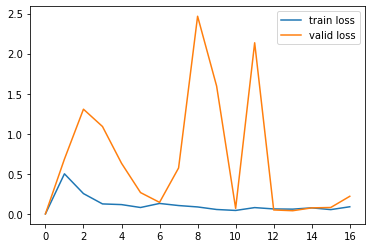

In [ ]:
plt.plot(torch.Tensor(train_loss), label='train loss')
plt.plot(torch.Tensor(test_loss), label='valid loss')
plt.legend()

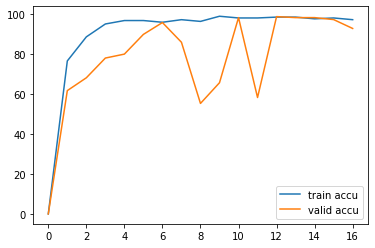

In [ ]:
plt.plot([t for t in torch.Tensor(train_accu)], label='train accu')
plt.plot([t for t in torch.Tensor(test_accu)], label='valid accu')
plt.legend()

8, 9, 11번째에 일시적으로 정확도 값이 떨어진 부분 외에  
train과 test 모두 정확도가 점점 올랐다 14번째부터 조금 꺾이는 모습을 보인다.  
train과 test의 차이가 적으면서도 정확도가 둘 다 높은 13번째의 모델이 사용하기 좋은 모델로 보인다.